In [14]:
%env LS_COLORS = None 
!tree --charset ascii  /home/yu/Templates/AE-VAE-GAN/DataLoder/data/dogcat/

env: LS_COLORS=None
/home/yu/Templates/AE-VAE-GAN/DataLoder/data/dogcat/
|-- cat.12484.jpg
|-- cat.12485.jpg
|-- cat.12486.jpg
|-- cat.12487.jpg
|-- dog.12496.jpg
|-- dog.12497.jpg
|-- dog.12498.jpg
`-- dog.12499.jpg

0 directories, 8 files


__getitem__:返回一条数据或者一个样本
__len__:返回样本的数量

In [20]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils import data

class DogCat(data.Dataset):
    def __init__(self, root):
        imgs = os.listdir(root)
        self.imgs = [os.path.join(root, img) for img in imgs]
    
    def __getitem__(self, index):
        img_path = self.imgs[index]
        label = 1 if 'dog' in img_path.split('/')[-1] else 0
        pil_img = Image.open(img_path)
        array = np.asarray(pil_img)
        data = torch.from_numpy(array)
        return data, label
    
    def __len__(self):
        return len(self.imgs)

In [21]:
dataset = DogCat('./data/dogcat/')
img, label = dataset[0] #相当于调用__getitem__(0)
for img, label in dataset:
    print(img.size(), img.float().mean(), label)

torch.Size([236, 289, 3]) 130.30038805153168 0
torch.Size([375, 499, 3]) 150.50795635715878 1
torch.Size([375, 499, 3]) 116.81384992206635 1
torch.Size([400, 300, 3]) 128.154975 1
torch.Size([499, 379, 3]) 171.80847887507645 0
torch.Size([377, 499, 3]) 151.7174171508357 1
torch.Size([500, 497, 3]) 106.4915063715627 0
torch.Size([374, 499, 3]) 115.51768778198108 0


对PIL Image的操作包括：

    Scale：调整图片尺寸，长宽比保持不变
    CenterCrop、RandomCrop、RandomSizedCrop： 裁剪图片
    Pad：填充
ToTensor：将PIL Image对象转成Tensor，会自动将[0, 255]归一化至[0, 1]
对Tensor的操作包括：

    Normalize：标准化，即减均值，除以标准差
    ToPILImage：将Tensor转为PIL Image对象

In [7]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils import data
from torchvision import transforms

transform = transforms.Compose([
                                transforms.Resize(224),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                    [0.5,0.5,0.5],
                                    [0.5,0.5,0.5])
])

class DogCat(data.Dataset):
    def __init__(self, root, transforms=None):
        imgs = os.listdir(root)
        self.imgs = [os.path.join(root, img) for img in imgs]
        self.transforms = transforms
        
    def __getitem__(self, index):
        img_path = self.imgs[index]
        label = 0 if 'dog' in img_path.split('/')[-1] else 1
        data = Image.open(img_path)
        if self.transforms:
            data = self.transforms(data)
        return data, label
    
    def __len__(self):
        return len(self.imgs)
    
dataset = DogCat('./data/dogcat/', transforms=transform)
img, label = dataset[0]
for img, label in dataset:
    print(img.size(), label)

torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 0
torch.Size([3, 224, 224]) 1
torch.Size([3, 224, 224]) 1


ImageFolder，它的实现和上述的DogCat很相似。ImageFolder假设所有的文件按文件夹保存，每个文件夹下存储同一个类别的图片，文件夹名为类名，其构造函数如下：

ImageFolder(root, transform=None, target_transform=None, loader=default_loader)

它主要有四个参数：

    root：在root指定的路径下寻找图片
    transform：对PIL Image进行的转换操作，transform的输入是使用loader读取图片的返回对象
    target_transform：对label的转换
    loader：给定路径后如何读取图片，默认读取为RGB格式的PIL Image对象
    label是按照文件夹名顺序排序后存成字典，即{类名:类序号(从0开始)}，一般来说最好直接将文件夹命名为从0开始的数字，这样会和ImageFolder实际的label一致   self.class_to_idx属性以了解label和文件夹名的映射关系

In [8]:
!tree --charset ASCII  data/dogcat_2/

data/dogcat_2/
|-- cat
|   |-- cat.12484.jpg
|   |-- cat.12485.jpg
|   |-- cat.12486.jpg
|   `-- cat.12487.jpg
`-- dog
    |-- dog.12496.jpg
    |-- dog.12497.jpg
    |-- dog.12498.jpg
    `-- dog.12499.jpg

2 directories, 8 files


In [9]:
from torchvision.datasets import ImageFolder
dataset = ImageFolder('data/dogcat_2/')

In [10]:
# cat文件夹的图片对应label 0，dog对应1
dataset.class_to_idx

{'cat': 0, 'dog': 1}

In [11]:
# 所有图片的路径和对应的label
dataset.imgs

[('data/dogcat_2/cat/cat.12484.jpg', 0),
 ('data/dogcat_2/cat/cat.12485.jpg', 0),
 ('data/dogcat_2/cat/cat.12486.jpg', 0),
 ('data/dogcat_2/cat/cat.12487.jpg', 0),
 ('data/dogcat_2/dog/dog.12496.jpg', 1),
 ('data/dogcat_2/dog/dog.12497.jpg', 1),
 ('data/dogcat_2/dog/dog.12498.jpg', 1),
 ('data/dogcat_2/dog/dog.12499.jpg', 1)]

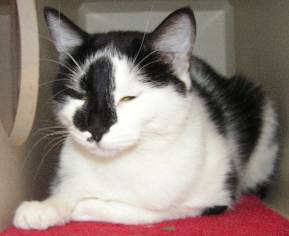

In [14]:
# 没有任何的transform，所以返回的还是PIL Image对象
dataset[2][1]# 第一维是第几张图，第二维为1返回label
dataset[2][0]# 为0返回图片数据